## Testing Trades

In [242]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
register_matplotlib_converters()
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [215]:
company = 'IOC.NS'
data = web.DataReader(company, 'yahoo', '2014-01-01',datetime.now())

In [216]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-04,68.000000,67.099998,68.000000,67.300003,10513995.0,67.300003
2022-10-06,68.099998,67.349998,67.949997,67.750000,13000167.0,67.750000
2022-10-07,67.849998,67.050003,67.650002,67.449997,14879891.0,67.449997
2022-10-10,67.699997,66.849998,67.000000,67.550003,9042660.0,67.550003
2022-10-11,67.699997,65.800003,67.699997,65.949997,14893976.0,65.949997


In [217]:
# Calculate the Moving average of closing price

data['SMA1'] = data['Close'].rolling(window=20).mean()
data['SMA2'] = data['Close'].rolling(window=100).mean()

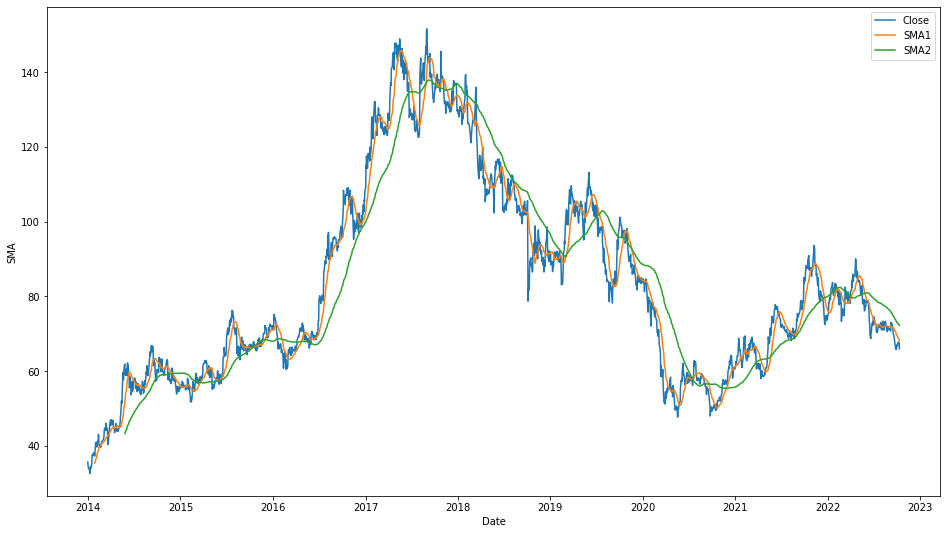

In [219]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(data.index, data['Close'], label = 'Close')

ax.plot(data['SMA1'].index, data['SMA1'], label= 'SMA1')
ax.plot(data['SMA2'].index, data['SMA2'], label= 'SMA2')
ax.set_xlabel('Date')
ax.set_ylabel('SMA')
ax.legend();

In [220]:
df_close = data['Close']
df_close = pd.DataFrame(df_close)

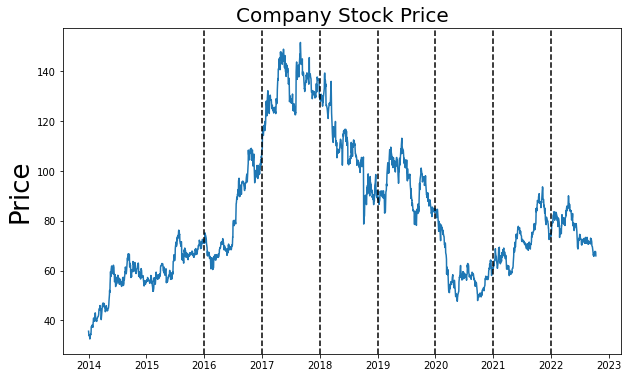

In [222]:
plt.figure(figsize = (10,6))
plt.plot(df_close.Close)
plt.title(f"Company Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


# Stationary: take first difference of the series

In [223]:
# take first difference
first_diff = df_close.Close.values[1:] - df_close.Close.values[:-1]
first_diff = np.concatenate([first_diff, [0]])

In [224]:
# set first differnce as variable in dataframe
df_close['first_difference'] = first_diff

In [227]:
# df_close.head()

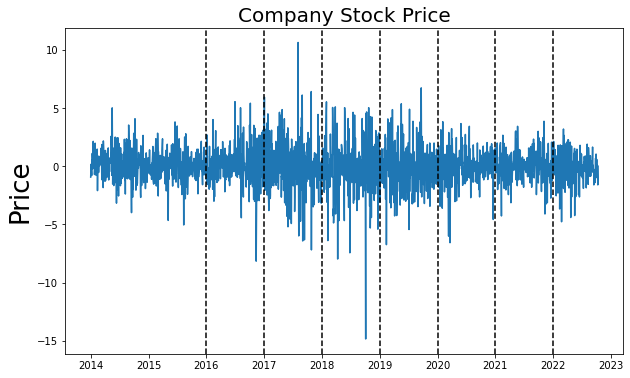

In [228]:
plt.figure(figsize = (10,6))
plt.plot(df_close.first_difference)
plt.title(f"Company Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


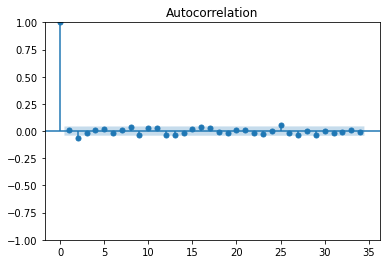

In [229]:
acf_plot = plot_acf(df_close.first_difference)

C:\Users\NEXT\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


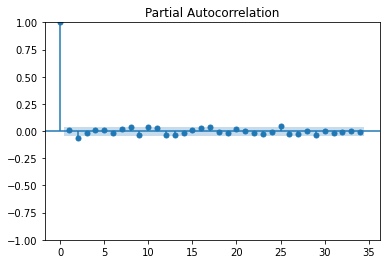

In [230]:
pacf_plot = plot_pacf(df_close.first_difference)

In [233]:
data_swing_month = pd.DataFrame(data["Close"])
# data_swing_month

In [234]:
data_swing_month['year'] = [d.year for d in data_swing_month.index]
data_swing_month['month'] = [d.strftime('%b') for d in data_swing_month.index]
years = data_swing_month['year'].unique()

In [236]:
# data_swing_month.head()

In [237]:
# prep colors
np.random.seed(300)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

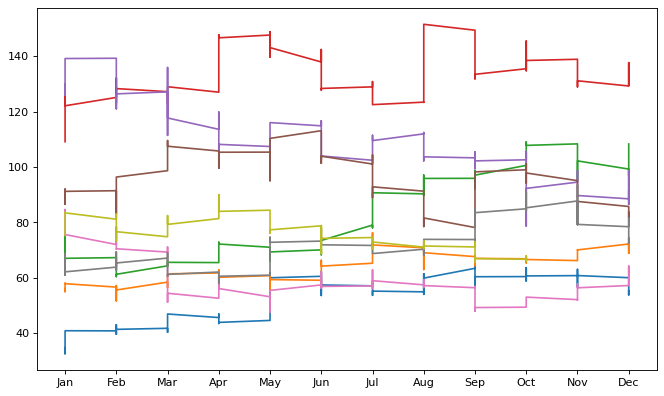

In [238]:
# Draw plot
plt.figure(figsize=(10,6), dpi = 80)
for i, y in enumerate(years):
    if i >0:
        plt.plot('month', 'Close', data=data_swing_month.loc[data_swing_month.year==y,:], label=y)
#         plt.text(data_swing_month.loc[data_swing_month.year==y,:].shape[0]-.9, data_swing_month.loc[data_swing_month.year==y,'Close'][-1:].values[0],y,fontsize=12, color=mycolors[i])

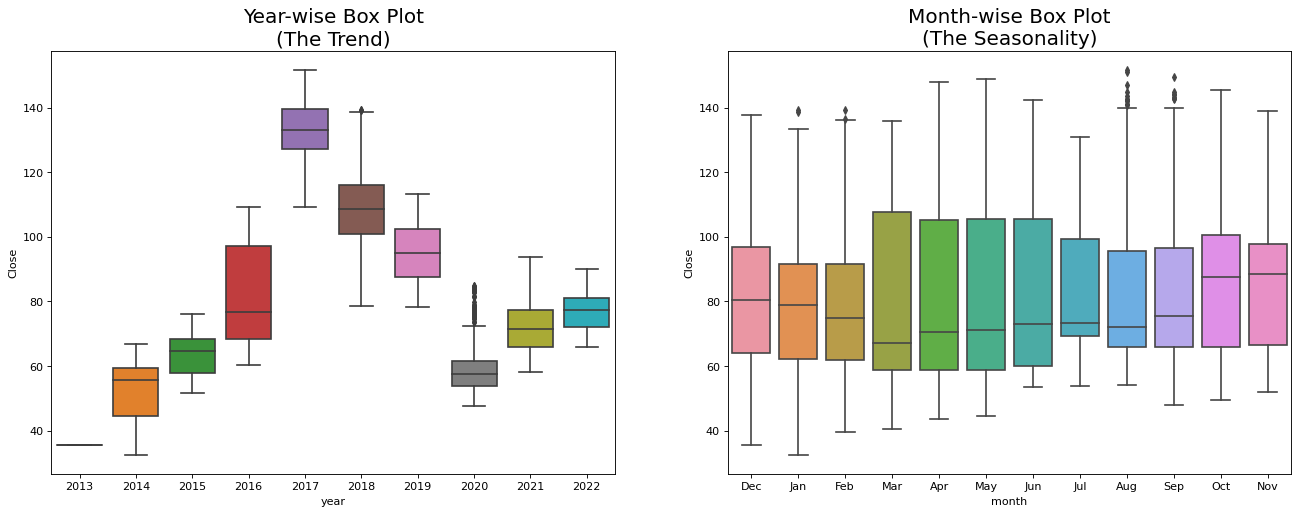

In [239]:
# Import Data
# df = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
# # df.reset_index(inplace=True)

# # Prepare data
# df['year'] = [d.year for d in df.date]
# df['month'] = [d.strftime('%b') for d in df.date]
# years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=data_swing_month, ax=axes[0])
sns.boxplot(x='month', y='Close', data=data_swing_month.loc[~data_swing_month.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [262]:

df_close = df_close.reindex(pd.date_range(df_close.index.min(), df_close.index.max())).sort_index(ascending=False).reset_index().rename(columns={'index': 'Date'})

In [263]:
df_close.sort_index(ascending=True)

,Date,Close,first_difference
0,2022-10-11,65.949997,0.000000
1,2022-10-10,67.550003,-1.600006
2,2022-10-09,67.449997,0.100006
3,2022-10-08,67.449997,0.100006
4,2022-10-07,67.449997,0.100006
...,...,...,...
3202,2014-01-04,33.908333,0.183334
3203,2014-01-03,33.908333,0.183334
3204,2014-01-02,34.299999,-0.391666
3205,2014-01-01,34.758331,-0.458332


In [264]:
df_close = df_close.fillna(method='bfill').fillna(method='ffill')

In [265]:
df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close.set_index('Date', inplace=True)
df_close.sort_index(ascending=True)

,Close,first_difference
Date,,
2013-12-31,35.691666,-0.933334
2014-01-01,34.758331,-0.458332
2014-01-02,34.299999,-0.391666
2014-01-03,33.908333,0.183334
2014-01-04,33.908333,0.183334
...,...,...
2022-10-07,67.449997,0.100006
2022-10-08,67.449997,0.100006
2022-10-09,67.449997,0.100006


## Decompose timeseries into its components

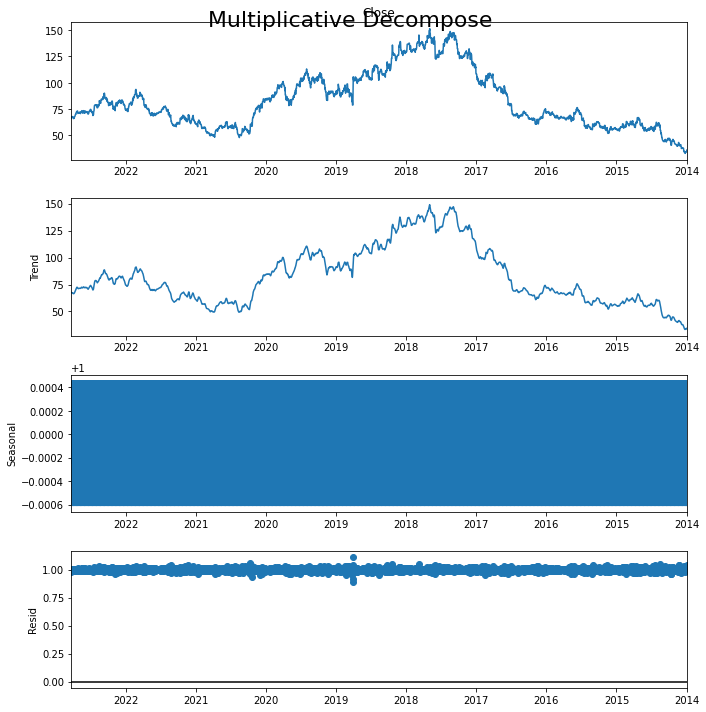

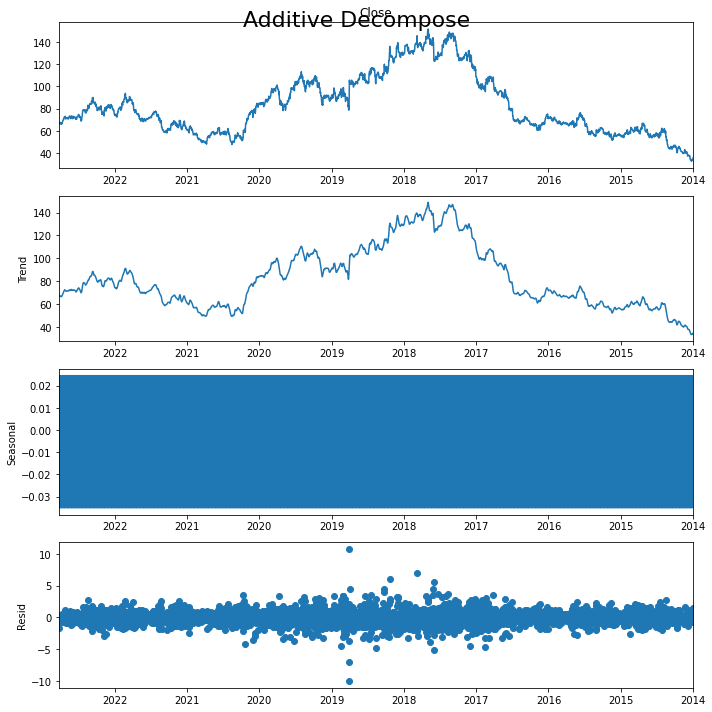

In [266]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_close['Close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_close['Close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [267]:
# Extract the components - 
# Actual Value = Product of (Seasonal * Trend* Resid)

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seasonal','trend','resid','actual_values']
df_reconstructed.head()

,seasonal,trend,resid,actual_values
Date,,,,
2022-10-11,1.000146,67.656632,0.974633,65.949997
2022-10-10,0.999756,67.583928,0.999742,67.550003
2022-10-09,1.000112,67.511224,0.998981,67.449997
2022-10-08,1.000299,67.271428,1.002355,67.449997
2022-10-07,1.000456,67.464286,0.999333,67.449997
